In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.mnist.load_data()
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

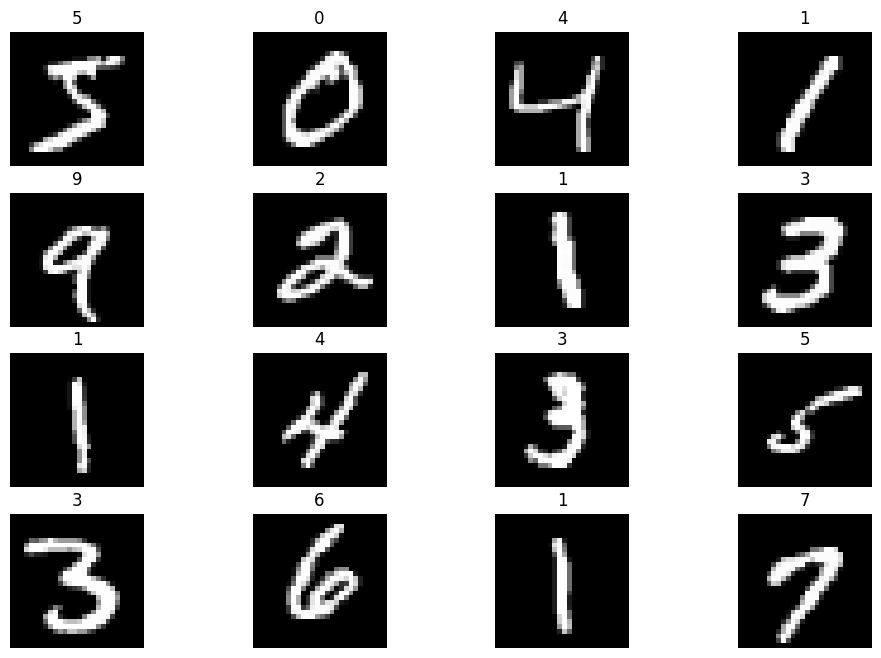

In [ ]:
# Let's visualize some data
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 8))
for i in range(16):
  idx = random.randint(0, len(X_train) - 1)
  plt.subplot(4, 4, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.title(y_train[i])
  plt.axis("off")

In [ ]:
# Build a CNN Model

# Set the random seed
tf.random.set_seed(42)

# Create a model by using Sequential API
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Get the summary of the model
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,298 (94.91 KB)

 Trainable params: 24,298 (94.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_1 = model_0.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8770 - loss: 1.1699
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9782 - loss: 0.0730
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9843 - loss: 0.0512
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9864 - loss: 0.0457
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9878 - loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9909 - loss: 0.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9907 - loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9920 - loss: 0.0249
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9937 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9938 - loss: 0.0201


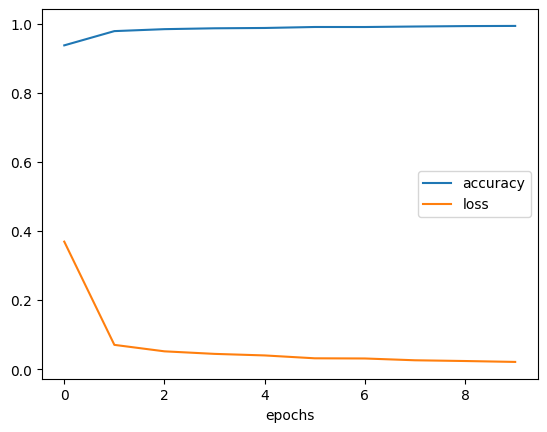

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.xlabel("epochs")
plt.show()

In [ ]:
model_0.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9773 - loss: 0.1563


[0.12946400046348572, 0.9825999736785889]

In [ ]:
y_preds = model_0.predict(X_test)
tf.argmax(y_preds[:5], axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<tf.Tensor: shape=(5,), dtype=int64, numpy=array([7, 2, 1, 0, 4])>

In [ ]:
tf.argmax(y_preds[:5], axis=0)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 1, 0, 4, 2, 2, 0, 2, 0])>

In [ ]:
tf.argmax(y_preds[:5])

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 1, 0, 4, 2, 2, 0, 2, 0])>

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
# Get the wrong preds
wrong_preds = y_preds.argmax(axis=1) != y_test
wrong_preds.sum()

174

There are 174 wrong predictions


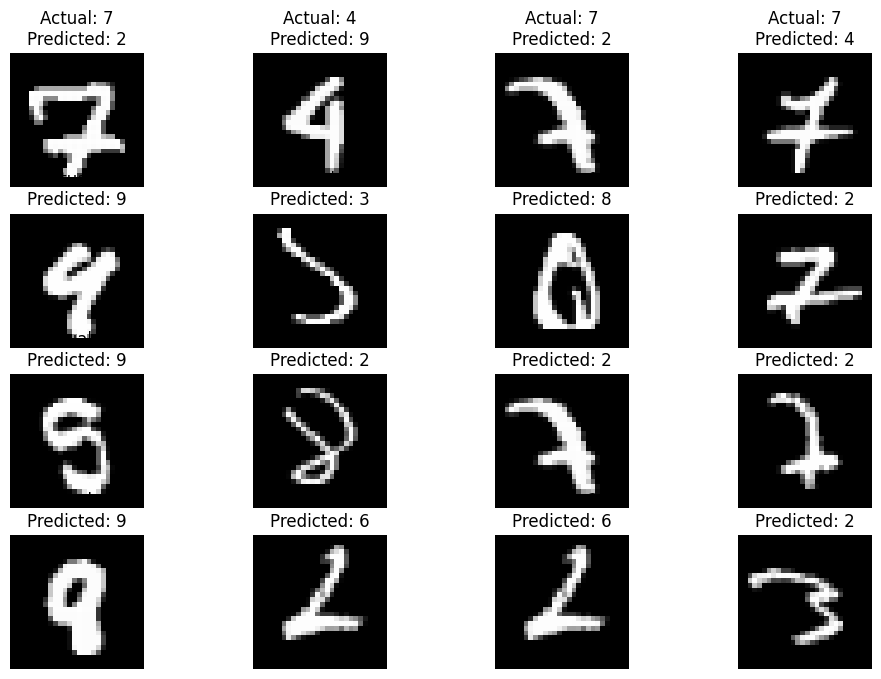

In [ ]:
wrong_preds = [i for i in range(len(y_test)) if y_preds[i].argmax() != y_test[i]]
print(f"There are {len(wrong_preds)} wrong predictions")

plt.figure(figsize=(12, 8))
for i in range(16):
  idx = random.choice(wrong_preds)
  plt.subplot(4, 4, i+1)
  plt.imshow(X_test[idx], cmap="gray")
  plt.title(f"Actual: {y_test[idx]}\nPredicted: {y_preds[idx].argmax()}")
  plt.axis("off")